In [215]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json


In [3]:
fileName = '000027073-RamanDdsApdBsbTimeScan.h5'


f = h5py.File(fileName,'r')
#Get the HDF5 group
group = f['datasets']
population = f['datasets/plot.1d_scan.histogram_context.probability']
P1 = np.transpose(population[()])[0]
time = f['datasets/scan/duration']
time = time[()]

In [90]:
keys = list(f.keys())
keys

['archive',
 'artiq_version',
 'datasets',
 'expid',
 'rid',
 'run_time',
 'start_time']

In [258]:
archive_keys = list(f['datasets'].keys())
archive_keys

['dax',
 'histogram_context',
 'plot.1d_scan.histogram_context.fit',
 'plot.1d_scan.histogram_context.probability',
 'scan']

['dax_sim_enabled',
 'dax_version',
 'git_commit',
 'git_dirty',
 'git_path',
 'system_id',
 'system_version']

In [218]:
this = []
for i in archive_keys:
    string = 'archive/'+i
    this.append(f[string][()])
archive_info = pd.DataFrame(data=this, columns=['Data'], index=archive_keys)
archive_info

,Data
experiment.camera.detection_thresholds.0,1.503200e+04
experiment.camera.image_region.h_end,2.690000e+02
experiment.camera.image_region.h_start,2.580000e+02
experiment.camera.image_region.v_end,2.560000e+02
experiment.camera.image_region.v_start,2.510000e+02
experiment.camera.rois.0.h_end,5.000000e+00
experiment.camera.rois.0.h_start,0.000000e+00
experiment.camera.rois.0.v_end,6.000000e+00
experiment.camera.rois.0.v_start,0.000000e+00
experiment.ion_number,1.000000e+00


In [219]:
version = str(f['artiq_version'][()])
version

"b'7.7612.47bf5d36.beta'"

In [229]:
datasets_keys = len((f['datasets/plot.1d_scan.histogram_context.probability']))
datasets_keys

100

In [220]:
f['datasets/scan/product/duration'][()]

array([0.00000000e+00, 5.05050505e-05, 1.01010101e-04, 1.51515152e-04,
       2.02020202e-04, 2.52525253e-04, 3.03030303e-04, 3.53535354e-04,
       4.04040404e-04, 4.54545455e-04, 5.05050505e-04, 5.55555556e-04,
       6.06060606e-04, 6.56565657e-04, 7.07070707e-04, 7.57575758e-04,
       8.08080808e-04, 8.58585859e-04, 9.09090909e-04, 9.59595960e-04,
       1.01010101e-03, 1.06060606e-03, 1.11111111e-03, 1.16161616e-03,
       1.21212121e-03, 1.26262626e-03, 1.31313131e-03, 1.36363636e-03,
       1.41414141e-03, 1.46464646e-03, 1.51515152e-03, 1.56565657e-03,
       1.61616162e-03, 1.66666667e-03, 1.71717172e-03, 1.76767677e-03,
       1.81818182e-03, 1.86868687e-03, 1.91919192e-03, 1.96969697e-03,
       2.02020202e-03, 2.07070707e-03, 2.12121212e-03, 2.17171717e-03,
       2.22222222e-03, 2.27272727e-03, 2.32323232e-03, 2.37373737e-03,
       2.42424242e-03, 2.47474747e-03, 2.52525253e-03, 2.57575758e-03,
       2.62626263e-03, 2.67676768e-03, 2.72727273e-03, 2.77777778e-03,
      

In [290]:
raw_data = pd.DataFrame()
scan_strings = list(f['datasets/scan/product'].keys())
rows = []

scan_calls = []
for i in scan_variables:
    scan_calls.append('datasets/scan/product/'+i)

for i in range(len(list(f[scan_calls[0]]))):
    input = []
    for j in scan_calls:
        input.append(f[j][i])
    rows.append(input)

result_strings = []
for i in list(f['datasets/'].keys()):
    if i in ['dax', 'histogram_context', 'scan']:
        pass
    else:
        result_strings.append(i)

results = []
for j in result_strings:
    results = list((f['datasets/' + j][()]))
    for i in range(len(rows)):
        rows[i].append(float(results[i]))


column_strings = scan_strings+result_strings

data = pd.DataFrame(data = rows, columns=column_strings)
data

,duration,plot.1d_scan.histogram_context.fit,plot.1d_scan.histogram_context.probability
0,0.000000,0.000000,0.000
1,0.000051,0.146909,0.190
2,0.000101,0.498771,0.525
3,0.000152,0.849566,0.750
4,0.000202,0.994937,0.935
...,...,...,...
95,0.004798,0.256701,0.170
96,0.004848,0.110992,0.060
97,0.004899,0.192644,0.195
98,0.004949,0.452937,0.575


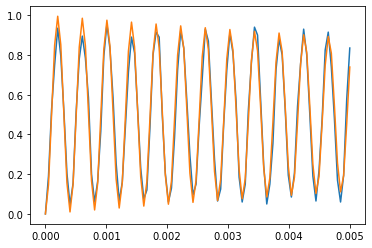

In [233]:
plt.plot(data['duration'], data['Probabilities'])
plt.plot(data['duration'], data['Fit'])

In [328]:
exp_id = (f['expid'][()])
exp_id = json.loads(exp_id)
exp_dict = exp_id['arguments']

exp_id = pd.DataFrame(exp_id)
column_list = exp_id.columns.values.tolist()
arguments = exp_id.filter(items=['arguments'])
print(exp_dict)

exp_info = exp_id.filter(items=column_list).iloc[0]
list(exp_info)

keys = list(exp_info.index)
values = list(exp_info)

# using map and dict type casting
# to convert lists to dictionary
res = dict(map(lambda i,j : (i,j) , keys,values))
exp_dict.update(res)

{'Raman Phase mode': 'TRACKING', 'Raman AWG output amplitude': 0.9, 'Raman DDS DAC amplitude': 1.5, 'Raman DDS attenuation': 0.0, 'DDS frequency': 345992832.0, 'DDS attenuation': 0.0, 'AWG frequency': 200000000.0, 'AWG waveform amplitude': 0.3, 'AWG output amplitude': 1.0, 'Phase mode': 'TRACKING', 'APD Detection time': 0.00025, 'Detection bins': 5, 'APD Threshold': 4, 'Doppler cooling time': 0.006, 'Doppler cooling dark threshold': 30, 'Optical pumping time': 0.0001, 'Raman DAC amplitude': 1.5, 'Raman DDS amplitude': 0.3, 'Optical pumping duration': 5e-05, 'Number of sb cooling pulses': 35, 'Cool radial X modes': True, 'Cool radial Y modes': True, 'Number of modes to cool': 1, '411 Frequency': 206000000.0, '411 Attenuation': 9.0, '760 Frequency': 364000000.0, '760 Power': 30.0, 'Image H start': 258.0, 'Image V start': 251.0, 'Image H end': 269.0, 'Image V end': 256.0, 'Detection time': 0.002, 'Raman pulse duration': {'start': 0.0, 'stop': 0.005, 'npoints': 100, 'randomize': False, 'se

{'Raman Phase mode': 'TRACKING',
 'Raman AWG output amplitude': 0.9,
 'Raman DDS DAC amplitude': 1.5,
 'Raman DDS attenuation': 0.0,
 'DDS frequency': 345992832.0,
 'DDS attenuation': 0.0,
 'AWG frequency': 200000000.0,
 'AWG waveform amplitude': 0.3,
 'AWG output amplitude': 1.0,
 'Phase mode': 'TRACKING',
 'APD Detection time': 0.00025,
 'Detection bins': 5,
 'APD Threshold': 4,
 'Doppler cooling time': 0.006,
 'Doppler cooling dark threshold': 30,
 'Optical pumping time': 0.0001,
 'Raman DAC amplitude': 1.5,
 'Raman DDS amplitude': 0.3,
 'Optical pumping duration': 5e-05,
 'Number of sb cooling pulses': 35,
 'Cool radial X modes': True,
 'Cool radial Y modes': True,
 'Number of modes to cool': 1,
 '411 Frequency': 206000000.0,
 '411 Attenuation': 9.0,
 '760 Frequency': 364000000.0,
 '760 Power': 30.0,
 'Image H start': 258.0,
 'Image V start': 251.0,
 'Image H end': 269.0,
 'Image V end': 256.0,
 'Detection time': 0.002,
 'Raman pulse duration': {'start': 0.0,
  'stop': 0.005,
  'np

In [146]:
arguments

,arguments
411 Attenuation,9.0
411 Frequency,206000000.0
760 Frequency,364000000.0
760 Power,30.0
APD Detection time,0.00025
APD Threshold,4
AWG frequency,200000000.0
AWG output amplitude,1.0
AWG waveform amplitude,0.3
Cool radial X modes,True


In [147]:
exp_info.append()

log_level                                                    30
file          calibrations/raman/dds/rmn_dds_apd_bsb_time_sc...
class_name                               RamanDdsApdBsbTimeScan
arguments                                                   9.0
repo_rev                                                    N/A
Name: 411 Attenuation, dtype: object

In [74]:
f['rid'][()]

27073

In [18]:
f['run_time'][()]

1666584595.770181

In [19]:
f['start_time'][()]

1666584595.1042197